In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip "/content/drive/My Drive/DeepLearning_Project_1/tumor_dataset/tumor_dataset.zip" -d "/content/dataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/__MACOSX/Train/Not-healthy/._Cancer (1120).JPG  
  inflating: /content/dataset/Train/Not-healthy/Cancer (1989).jpg  
  inflating: /content/dataset/__MACOSX/Train/Not-healthy/._Cancer (1989).jpg  
  inflating: /content/dataset/Train/Not-healthy/Cancer (835).jpg  
  inflating: /content/dataset/__MACOSX/Train/Not-healthy/._Cancer (835).jpg  
  inflating: /content/dataset/Train/Not-healthy/Cancer (1823).jpg  
  inflating: /content/dataset/__MACOSX/Train/Not-healthy/._Cancer (1823).jpg  
  inflating: /content/dataset/Train/Not-healthy/Cancer (2219).jpg  
  inflating: /content/dataset/__MACOSX/Train/Not-healthy/._Cancer (2219).jpg  
  inflating: /content/dataset/Train/Not-healthy/Cancer (970).jpg  
  inflating: /content/dataset/__MACOSX/Train/Not-healthy/._Cancer (970).jpg  
  inflating: /content/dataset/Train/Not-healthy/Cancer (1966).jpg  
  inflating: /content/dataset/__MACOSX/Train/Not-healthy/._Cancer (1966

In [ ]:
#i didn't freeze the neural network in order to update all the weights of the network with respect to my dataset
def feature_extractor(inputs):

  model = tf.keras.applications.VGG16(include_top= False, input_shape = (224, 224,3))

  feature_extractor = model(inputs)

  return feature_extractor


In [ ]:

def dense_layers(features):

  x = tf.keras.layers.GlobalAveragePooling2D()(features)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

  return x

In [ ]:

def final_model(inputs):

  feature_cnn = feature_extractor(inputs)

  dense = dense_layers(feature_cnn)

  model = tf.keras.Model(inputs = inputs, outputs = dense)

  return model

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))

model = final_model(inputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 14,715,201
Non-trainable params: 0
_______________________________________________

In [ ]:
%cd /content

/content


In [ ]:
TRAINING_DIR = 'dataset/Train'
VAL_DIR = 'dataset/Val'
TEST_DIR = 'dataset/Test'

In [ ]:
#you can change the batch size if you wish, but increasing that to a big number might result in RAM limit ERROR
train_datagen = ImageDataGenerator (rescale = 1./255)
val_datagen = ImageDataGenerator (rescale = 1./255)
test_datagen = ImageDataGenerator (rescale = 1./255)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = 32,
                                                    class_mode = 'binary',
                                                    target_size = (224, 224))


val_generator = val_datagen.flow_from_directory(VAL_DIR,
                                                    batch_size = 32,
                                                    class_mode = 'binary',
                                                    target_size = (224, 224))


test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                    batch_size = 32,
                                                    class_mode = 'binary',
                                                    target_size = (224, 224))

Found 3880 images belonging to 2 classes.
Found 516 images belonging to 2 classes.
Found 208 images belonging to 2 classes.


In [ ]:
#learning rate value at 0.001 result in getting stuck at val accuracy = 0.50
#thus, it is recommended to do not change that
model.compile(optimizer = Adam(learning_rate = 0.0001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
#make sure to use modelcheckpoint callbacks in order to save your weights every epochs to can 
#continue your training if you loss network
#you can also increase the number of epochs, but be careful about overfitting
history_vgg = model.fit(train_generator,
                        validation_data = val_generator,
                        epochs = 5,
                        callbacks = [ModelCheckpoint('drive/MyDrive/github_projects/tumor/weights/{epoch:03d}__checkpoints.h5',
                                                     verbose = 1),
                                     EarlyStopping(patience = 3, monitor = 'val_loss')
                                     ])

Epoch 1/5
122/122 [==============================] - ETA: 0s - loss: 0.5712 - accuracy: 0.6871
Epoch 00001: saving model to drive/MyDrive/github_projects/tumor/weights/001__checkpoints.h5
122/122 [==============================] - 106s 855ms/step - loss: 0.5712 - accuracy: 0.6871 - val_loss: 0.4847 - val_accuracy: 0.7539
Epoch 2/5
122/122 [==============================] - ETA: 0s - loss: 0.2829 - accuracy: 0.8820
Epoch 00002: saving model to drive/MyDrive/github_projects/tumor/weights/002__checkpoints.h5
122/122 [==============================] - 104s 854ms/step - loss: 0.2829 - accuracy: 0.8820 - val_loss: 0.4635 - val_accuracy: 0.8779
Epoch 3/5
122/122 [==============================] - ETA: 0s - loss: 0.1282 - accuracy: 0.9590
Epoch 00003: saving model to drive/MyDrive/github_projects/tumor/weights/003__checkpoints.h5
122/122 [==============================] - 104s 854ms/step - loss: 0.1282 - accuracy: 0.9590 - val_loss: 0.2386 - val_accuracy: 0.9322
Epoch 4/5
122/122 [============

In [ ]:
# [loss, accuracy]
model.evaluate(test_generator)

7/7 [==============================] - 7s 1s/step - loss: 0.1068 - accuracy: 0.9712


[0.10676129907369614, 0.9711538553237915]

In [ ]:
predictions = model.predict(test_generator[0][0])

In [ ]:
predictions[predictions < 0.5] = 0
predictions[predictions >= 0.5] = 1

In [ ]:
#test batches
test_generator[0][0].shape

(32, 224, 224, 3)

In [ ]:
#labels
test_generator[0][1].shape

(32,)

Text(0.5, 1.0, 'y_true : 1.0 and the prediction is [1.]')

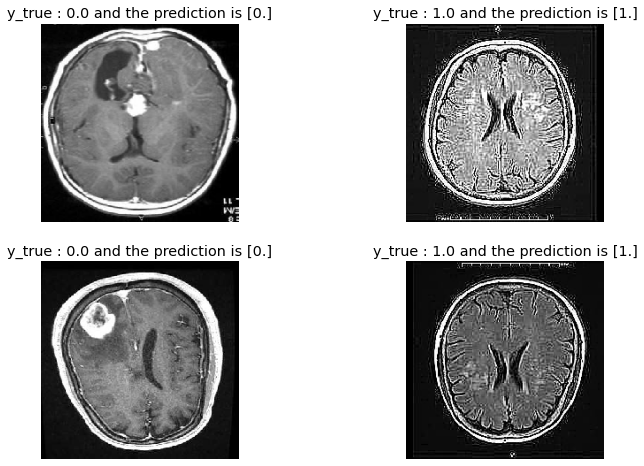

In [ ]:
# plot 4 pictures of test data
fig = plt.figure(figsize = (12, 8))
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)

plt.imshow(test_generator[0][0][0])
plt.axis('off')
plt.title("y_true : {} and the prediction is {}".format(test_generator[0][1][0], predictions[0]))


fig.add_subplot(rows, columns, 2)

plt.imshow(test_generator[0][0][1])
plt.axis('off')
plt.title("y_true : {} and the prediction is {}".format(test_generator[0][1][1], predictions[1]))


fig.add_subplot(rows, columns, 3)

plt.imshow(test_generator[0][0][2])
plt.axis('off')
plt.title("y_true : {} and the prediction is {}".format(test_generator[0][1][2], predictions[2]))


fig.add_subplot(rows, columns, 4)

plt.imshow(test_generator[0][0][3])
plt.axis('off')
plt.title("y_true : {} and the prediction is {}".format(test_generator[0][1][3], predictions[3]))


So, as we can see, labels and our predictions are the same, which is great

0 labels are unhealthy
1 are healthy

In [ ]:
vgg_history = pd.DataFrame(history_vgg.history)

In [ ]:
vgg_history_loss = vgg_history['loss'].values
vgg_history_accuracy = vgg_history['accuracy'].values
vgg_history_valloss = vgg_history['val_loss'].values
vgg_history_valacc = vgg_history['val_accuracy'].values

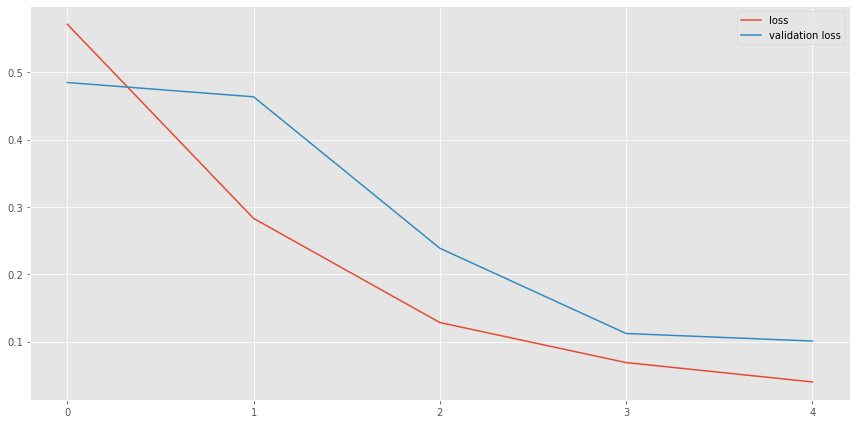

In [ ]:
plt.style.use('ggplot')
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(vgg_history_loss, label = 'loss')
ax.plot(vgg_history_valloss, label ='validation loss')
ax.set_xticks(np.arange(5))#replace 5 with your number of epochs
fig.tight_layout()
ax.legend()
plt.show()

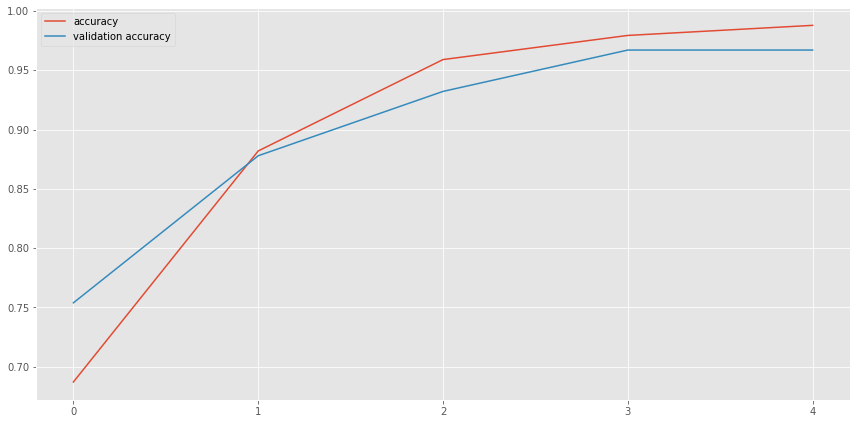

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(vgg_history_accuracy, label = 'accuracy')
ax.plot(vgg_history_valacc, label ='validation accuracy')
ax.set_xticks(np.arange(5))
fig.tight_layout()
ax.legend()
plt.show()